In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../data/data_correlation_gone.csv',index_col = 0)

In [3]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [4]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
df.drop(all_indices,axis=0,inplace= True)

In [7]:
df.corr()['price']

price                    1.000000
bedrooms                 0.310402
bathrooms                0.471498
sqft_living              0.648984
sqft_lot                 0.105762
floors                   0.267947
waterfront               0.110025
view                     0.318627
condition                0.053017
grade                    0.658134
zipcode                 -0.030058
Age_of_House            -0.043475
Years_last_renovation   -0.083669
basement                 0.170949
biggerliving             0.210994
biggerlot                0.032022
distance_from_a_city    -0.462042
distance_from_airport    0.252861
Name: price, dtype: float64

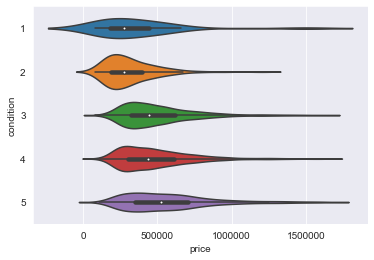

In [8]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

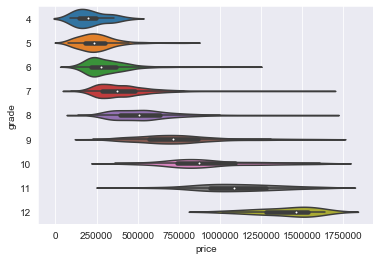

In [9]:
sns.violinplot(x='price', y='grade', data=df, orient='h')
plt.show()

In [12]:
features =  ['sqft_living','distance_from_a_city','sqft_lot', 'bedrooms','bathrooms']

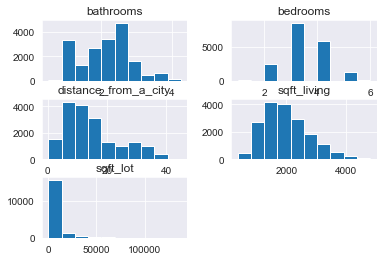

In [13]:
df[features].hist();

In [14]:
tobox =['sqft_living','distance_from_a_city','sqft_lot']

In [15]:
for feat in tobox:
    df[feat],l = scs.boxcox(df[feat])


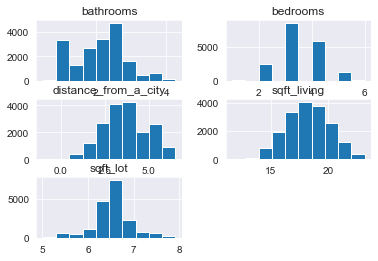

In [16]:
df[features].hist();

In [17]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [18]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']


In [19]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [20]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [21]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

# Create booleans for Grade 4 - 11

In [26]:
df['grade4'] = df.grade.apply(lambda x: 1 if x ==4 else 0)
df['grade5'] = df.grade.apply(lambda x: 1 if x ==5 else 0)
df['grade6'] = df.grade.apply(lambda x: 1 if x ==6 else 0)
df['grade7'] = df.grade.apply(lambda x: 1 if x ==7 else 0)
df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)


# Choosing Columns to Model

In [34]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9',
       'grade10', 'grade11']


# Building Model

In [35]:
X = df[x_cols]
y = df['price']

In [36]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          2.163e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:40:38   Log-Likelihood:                     -2.4149e+05
No. Observations:               18208   AIC:                                  4.830e+05
Df Residuals:                   18195   BIC:                                  4.831e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.632e+04   1378.677    -11.838      0.000    -1.9e+04   -1.36e+04
bathrooms             1.177e+04   1679.063      7.008      0.000    8476.059    1.51e+04
sqft_living           1.027e+05   2136.922     48.061      0.000    9.85e+04    1.07e+05
sqft_lot              3.006e+04   1255.454     23.944      0.000    2.76e+04    3.25e+04
distance_from_a_city -1.305e+05   1129.235   -115.592      0.000   -1.33e+05   -1.28e+05
grade4                4.842e+05   2.81e+04     17.216      0.000    4.29e+05    5.39e+05
grade5                4.525e+05   1.02e+04     44.175      0.000    4.32e+05    4.73e+05
grade6                4.306e+05   3880.080    110.980      0.000    4.23e+05    4.38e+05
grade7                4.541e+05   1710.655    265.459      0.000    4.51e+05    4.57e+05
grade8                5.055e+05   2016.305    250.725      0.000    5.02e+05    5.09e+05
grade9                6.223e+05   3405.721    182.734      0.000    6.16e+05    6.29e+05
grade10               7.239e+05   5497.800    131.678      0.000    7.13e+05    7.35e+05
grade11               8.461e+05   1.05e+04     80.546      0.000    8.25e+05    8.67e+05
==============================================================================
Omnibus:                     6105.279   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44082.181
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      10.072   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking if p-values are less than 0.05 and getting rid of them

In [37]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 13
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.632e+04,1378.677,-11.838,0.0,-1.9e+04,-1.36e+04
bathrooms,1.177e+04,1679.063,7.008,0.0,8476.059,1.51e+04
sqft_living,1.027e+05,2136.922,48.061,0.0,9.85e+04,1.07e+05
sqft_lot,3.006e+04,1255.454,23.944,0.0,2.76e+04,3.25e+04
distance_from_a_city,-1.305e+05,1129.235,-115.592,0.0,-1.33e+05,-1.28e+05


# Running a Second Iteration of the model

In [38]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          2.163e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:40:41   Log-Likelihood:                     -2.4149e+05
No. Observations:               18208   AIC:                                  4.830e+05
Df Residuals:                   18195   BIC:                                  4.831e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.632e+04   1378.677    -11.838      0.000    -1.9e+04   -1.36e+04
bathrooms             1.177e+04   1679.063      7.008      0.000    8476.059    1.51e+04
sqft_living           1.027e+05   2136.922     48.061      0.000    9.85e+04    1.07e+05
sqft_lot              3.006e+04   1255.454     23.944      0.000    2.76e+04    3.25e+04
distance_from_a_city -1.305e+05   1129.235   -115.592      0.000   -1.33e+05   -1.28e+05
grade4                4.842e+05   2.81e+04     17.216      0.000    4.29e+05    5.39e+05
grade5                4.525e+05   1.02e+04     44.175      0.000    4.32e+05    4.73e+05
grade6                4.306e+05   3880.080    110.980      0.000    4.23e+05    4.38e+05
grade7                4.541e+05   1710.655    265.459      0.000    4.51e+05    4.57e+05
grade8                5.055e+05   2016.305    250.725      0.000    5.02e+05    5.09e+05
grade9                6.223e+05   3405.721    182.734      0.000    6.16e+05    6.29e+05
grade10               7.239e+05   5497.800    131.678      0.000    7.13e+05    7.35e+05
grade11               8.461e+05   1.05e+04     80.546      0.000    8.25e+05    8.67e+05
==============================================================================
Omnibus:                     6105.279   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44082.181
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      10.072   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking for Multicollinearity using VIF

In [39]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.784024061174447),
 ('bathrooms', 2.6461217317003154),
 ('sqft_living', 4.286009305254603),
 ('sqft_lot', 1.4793714960044886),
 ('distance_from_a_city', 1.1968631261592602),
 ('grade4', 1.0193543809503682),
 ('grade5', 1.0766151050120933),
 ('grade6', 1.3651628193460597),
 ('grade7', 1.1723010451919627),
 ('grade8', 1.10280983056754),
 ('grade9', 1.2951309760610201),
 ('grade10', 1.2667929146738253),
 ('grade11', 1.1034607072479954)]

# Getting rid of scores less than 5 

In [40]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

13 13


In [41]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          2.163e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:41:20   Log-Likelihood:                     -2.4149e+05
No. Observations:               18208   AIC:                                  4.830e+05
Df Residuals:                   18195   BIC:                                  4.831e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.632e+04   1378.677    -11.838      0.000    -1.9e+04   -1.36e+04
bathrooms             1.177e+04   1679.063      7.008      0.000    8476.059    1.51e+04
sqft_living           1.027e+05   2136.922     48.061      0.000    9.85e+04    1.07e+05
sqft_lot              3.006e+04   1255.454     23.944      0.000    2.76e+04    3.25e+04
distance_from_a_city -1.305e+05   1129.235   -115.592      0.000   -1.33e+05   -1.28e+05
grade4                4.842e+05   2.81e+04     17.216      0.000    4.29e+05    5.39e+05
grade5                4.525e+05   1.02e+04     44.175      0.000    4.32e+05    4.73e+05
grade6                4.306e+05   3880.080    110.980      0.000    4.23e+05    4.38e+05
grade7                4.541e+05   1710.655    265.459      0.000    4.51e+05    4.57e+05
grade8                5.055e+05   2016.305    250.725      0.000    5.02e+05    5.09e+05
grade9                6.223e+05   3405.721    182.734      0.000    6.16e+05    6.29e+05
grade10               7.239e+05   5497.800    131.678      0.000    7.13e+05    7.35e+05
grade11               8.461e+05   1.05e+04     80.546      0.000    8.25e+05    8.67e+05
==============================================================================
Omnibus:                     6105.279   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44082.181
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      10.072   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking for Normality

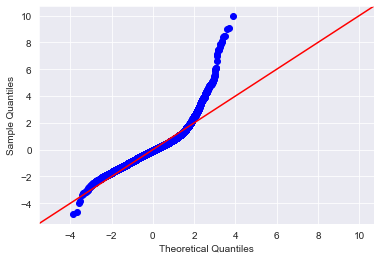

In [42]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


# Checking for Homoscedasticity

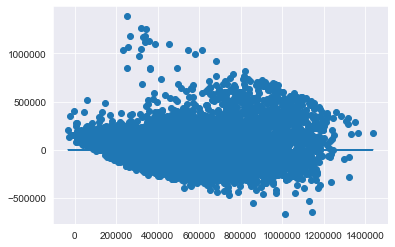

In [44]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

# Removing price points outside the 95th percentile

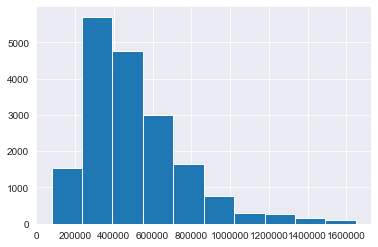

In [47]:
df.price.hist()

In [48]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 675960.0
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 716000.0
0.84 percentile: 730000.0
0.85 percentile: 746474.9999999995
0.86 percentile: 760000.0
0.87 percentile: 775000.0
0.88 percentile: 795000.0
0.89 percentile: 810229.9999999997
0.9 percentile: 834000.0
0.91 percentile: 855000.0
0.92 percentile: 880000.0
0.93 percentile: 911559.0000000019
0.94 percentile: 950000.0
0.95 percentile: 991629.9999999995
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [49]:
orig_tot = len(df)
df = df[df.price < 1000000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.04822056239015817


# Running our model again with new price points

In [53]:
X = df[x_cols]
y = df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3381.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:46:06   Log-Likelihood:            -2.2512e+05
No. Observations:               17330   AIC:                         4.503e+05
Df Residuals:                   17317   BIC:                         4.504e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.251e+04   1085.683    -11.520      0.000   -1.46e+04   -1.04e+04
bathrooms             3849.4898   1323.211      2.909      0.004    1255.862    6443.117
sqft_living           8.454e+04   1681.527     50.276      0.000    8.12e+04    8.78e+04
sqft_lot              2.419e+04    980.929     24.659      0.000    2.23e+04    2.61e+04
distance_from_a_city -1.091e+05    898.228   -121.501      0.000   -1.11e+05   -1.07e+05
grade4                4.296e+05   2.14e+04     20.050      0.000    3.88e+05    4.72e+05
grade5                4.108e+05   7821.059     52.525      0.000    3.95e+05    4.26e+05
grade6                4.008e+05   2986.685    134.189      0.000    3.95e+05    4.07e+05
grade7                4.415e+05   1314.374    335.882      0.000    4.39e+05    4.44e+05
grade8                4.993e+05   1557.437    320.580      0.000    4.96e+05    5.02e+05
grade9                5.888e+05   2738.173    215.047      0.000    5.83e+05    5.94e+05
grade10               6.484e+05   4834.698    134.120      0.000    6.39e+05    6.58e+05
grade11               7.075e+05    1.3e+04     54.624      0.000    6.82e+05    7.33e+05
==============================================================================
Omnibus:                      588.953   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              880.645
Skew:                           0.336   Prob(JB):                    5.89e-192
Kurtosis:                       3.876   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking p-values again

In [54]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 13
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.251e+04,1085.683,-11.520,0.000,-1.46e+04,-1.04e+04
bathrooms,3849.4898,1323.211,2.909,0.004,1255.862,6443.117
sqft_living,8.454e+04,1681.527,50.276,0.000,8.12e+04,8.78e+04
sqft_lot,2.419e+04,980.929,24.659,0.000,2.23e+04,2.61e+04
distance_from_a_city,-1.091e+05,898.228,-121.501,0.000,-1.11e+05,-1.07e+05


# Another model

In [238]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3381.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:49:32   Log-Likelihood:            -2.2512e+05
No. Observations:               17330   AIC:                         4.503e+05
Df Residuals:                   17317   BIC:                         4.504e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.251e+04   1085.683    -11.520      0.000   -1.46e+04   -1.04e+04
bathrooms             3849.4898   1323.211      2.909      0.004    1255.862    6443.117
sqft_living           8.454e+04   1681.527     50.276      0.000    8.12e+04    8.78e+04
sqft_lot              2.419e+04    980.929     24.659      0.000    2.23e+04    2.61e+04
distance_from_a_city -1.091e+05    898.228   -121.501      0.000   -1.11e+05   -1.07e+05
grade4                4.296e+05   2.14e+04     20.050      0.000    3.88e+05    4.72e+05
grade5                4.108e+05   7821.059     52.525      0.000    3.95e+05    4.26e+05
grade6                4.008e+05   2986.685    134.189      0.000    3.95e+05    4.07e+05
grade7                4.415e+05   1314.374    335.882      0.000    4.39e+05    4.44e+05
grade8                4.993e+05   1557.437    320.580      0.000    4.96e+05    5.02e+05
grade9                5.888e+05   2738.173    215.047      0.000    5.83e+05    5.94e+05
grade10               6.484e+05   4834.698    134.120      0.000    6.39e+05    6.58e+05
grade11               7.075e+05    1.3e+04     54.624      0.000    6.82e+05    7.33e+05
==============================================================================
Omnibus:                      588.953   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              880.645
Skew:                           0.336   Prob(JB):                    5.89e-192
Kurtosis:                       3.876   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking again for multicollinearity

In [58]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7820107261216414),
 ('bathrooms', 2.5289513178456273),
 ('sqft_living', 4.003616089353604),
 ('sqft_lot', 1.4848942739315893),
 ('distance_from_a_city', 1.2065528091596662),
 ('grade4', 1.0206064152403953),
 ('grade5', 1.0821534676084923),
 ('grade6', 1.3917483910138557),
 ('grade7', 1.1898061672372473),
 ('grade8', 1.1010485042123725),
 ('grade9', 1.2417648490291955),
 ('grade10', 1.176142365102153),
 ('grade11', 1.0290870760760285)]

In [59]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

13 13


# Running our model one more time

In [241]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3381.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:49:33   Log-Likelihood:            -2.2512e+05
No. Observations:               17330   AIC:                         4.503e+05
Df Residuals:                   17317   BIC:                         4.504e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.251e+04   1085.683    -11.520      0.000   -1.46e+04   -1.04e+04
bathrooms             3849.4898   1323.211      2.909      0.004    1255.862    6443.117
sqft_living           8.454e+04   1681.527     50.276      0.000    8.12e+04    8.78e+04
sqft_lot              2.419e+04    980.929     24.659      0.000    2.23e+04    2.61e+04
distance_from_a_city -1.091e+05    898.228   -121.501      0.000   -1.11e+05   -1.07e+05
grade4                4.296e+05   2.14e+04     20.050      0.000    3.88e+05    4.72e+05
grade5                4.108e+05   7821.059     52.525      0.000    3.95e+05    4.26e+05
grade6                4.008e+05   2986.685    134.189      0.000    3.95e+05    4.07e+05
grade7                4.415e+05   1314.374    335.882      0.000    4.39e+05    4.44e+05
grade8                4.993e+05   1557.437    320.580      0.000    4.96e+05    5.02e+05
grade9                5.888e+05   2738.173    215.047      0.000    5.83e+05    5.94e+05
grade10               6.484e+05   4834.698    134.120      0.000    6.39e+05    6.58e+05
grade11               7.075e+05    1.3e+04     54.624      0.000    6.82e+05    7.33e+05
==============================================================================
Omnibus:                      588.953   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              880.645
Skew:                           0.336   Prob(JB):                    5.89e-192
Kurtosis:                       3.876   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality Assumption

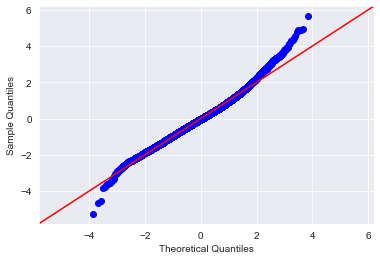

In [242]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


# Checking for Homoscedasticity

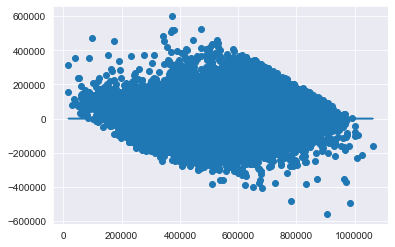

In [62]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [63]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [67]:
residuals = model.resid

Plotting Residauls to see distirbution

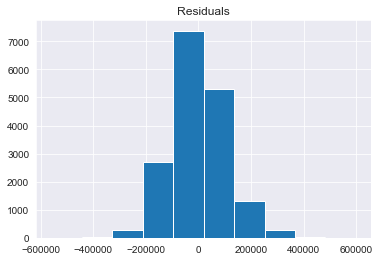

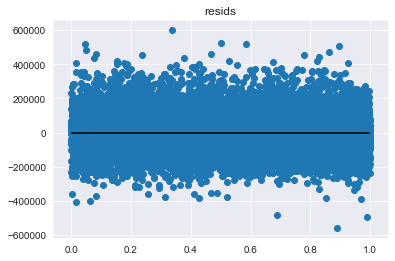

In [68]:
plot_residuals(residuals)

In [70]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

# Cross Validation 

In [71]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6979696892891452, 0.696863217000321, 0.697534876764698)

In [72]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-82178.65763162842, -82169.95943448489, -82049.41433591364)

In [73]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7002815911352959

In [74]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmae_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_absolute_error'))
    cvmae_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_absolute_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmae_5}")
    print(f"cv10  MSE score = {cvmae_10}")

    return ols

# Train test split

In [76]:
make_ols_sklearn(X, y)

train R2 score = 0.7005355706409031
test R2 score = 0.701714121788634
cv5 R2 score = 0.6979696892891452
cv10 R2 score = 0.696863217000321
cv5 MSE score = -82178.65763162842
cv10  MSE score = -82169.95943448489


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

# Shuffling data and performing cross validation to check if R2 stays the same 

In [81]:
X_shuff, y_shuff = shuffle(X, y)

In [82]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7002405500560707

In [83]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7000144745597903

In [84]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7001010144018041

# Final Model

In [85]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3381.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:49:48   Log-Likelihood:            -2.2512e+05
No. Observations:               17330   AIC:                         4.503e+05
Df Residuals:                   17317   BIC:                         4.504e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.251e+04 

In [259]:
model.params

bedrooms                -12506.748076
bathrooms                 3849.489777
sqft_living              84541.145793
sqft_lot                 24188.311954
distance_from_a_city   -109135.432615
grade4                  429646.623499
grade5                  410804.703559
grade6                  400781.684278
grade7                  441474.327153
grade8                  499282.505361
grade9                  588835.135122
grade10                 648431.594151
grade11                 707515.758015
dtype: float64

# plotting resiudals against price

In [260]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

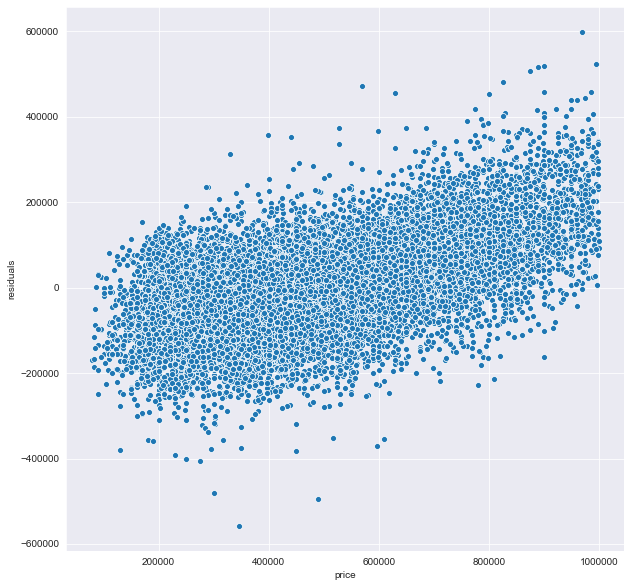

In [261]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

Can see from the above graph that after price goes above approx 600,000 the residuals start to skew

# Checking how our model predicts our data

In [87]:
ols = LinearRegression(fit_intercept=False,normalize=False)

In [88]:
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [89]:
df['price'].mean()

465923.81477207155

In [90]:
sample = df.loc[(df['price'] > 400000.00) & (df['price']<500000.00)]

In [91]:
sample [:len(sample)];

In [97]:
sample.shape

(3100, 13)

In [92]:
sample = sample[x_cols];

In [93]:
def predict_price(x_sample):
    cols =['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'distance_from_a_city',
 'grade4',
 'grade5',
 'grade6',
 'grade7',
 'grade8',
 'grade9',
 'grade10',
 'grade11']
    target = 'price'
    x_sample_final = x_sample[cols]
    return ols.predict(x_sample_final)[0]

In [94]:
predict_list = []
for i in range(len(sample)):
    predict = ols.predict(sample[i:i+1])
    predict_list.extend(predict)

In [95]:
df['price'].mean()

465923.81477207155

In [96]:
np.mean(predict_list)

463819.2696657925

**For House prices in a sample of 3100 houses between USD 400,000 and USD 500,000. The model predicted USD 2000 away from the average price** 

In [98]:
sample2 = df.loc[df['price']<800000.00]

In [99]:
np.mean(sample2['price'])

433455.2134593855

In [100]:
len(sample2)

16078

In [101]:
sample2 = sample2[x_cols]

In [102]:
predict_list2 = []
for i in range(len(sample2)):
    predict = ols.predict(sample2[i:i+1])
    predict_list2.extend(predict)

In [103]:
np.mean(predict_list2)

444960.85524981585

**For a Sample of 16078 houses, the average prediction was approx 11K off the average house price for sample**